In [44]:
import pandas as pd
houses = pd.read_csv('houses_to_rent_v2.csv')

In [45]:
houses.dtypes # Tipos por coluna
houses.dtypes.value_counts() # Contagem dos tipos por coluna

int64     9
object    4
dtype: int64

In [46]:
houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [47]:
# Trocao o nome da coluna para facilitar a manipulação
houses.rename(columns={'rent amount (R$)':'valor_aluguel'}, inplace=True)
houses.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

### Média versus Mediana
Observa-se que pelo fato de a média estar ligeiramente acima do valor da mediana os dados contém outliers:

In [48]:
houses['valor_aluguel'].mean()

3896.247194163861

In [49]:
houses['valor_aluguel'].median()

2661.0

### O desvio padrão 
Também está alto, o que indica que o quão os dados estão esparsos.

In [50]:
houses['valor_aluguel'].std()

3408.5455176710675

### Describe() - Análise descritiva
O último quartil possui valores acima de 5.000,00. O valor máximo é 9 x maior

In [51]:
houses['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

### Plot Histograma
O parâmetro 'bins' remete a segmentação, quanto maior mais resoluto o gráfico

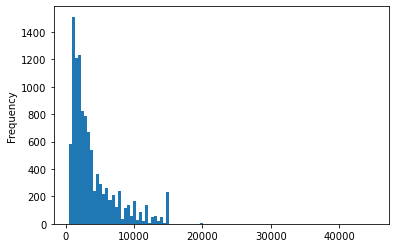

In [52]:
houses['valor_aluguel'].plot(kind='hist', bins=100)

### Qual a cidade com a média de aluguel mais alta?

In [70]:
houses.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending=False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


### Quantos banheiros existem em média nas residências com aluguéis mais altos?
#### Definição de aluguel alto: acima de 5000,00

In [77]:
houses['aluguel_alto'] = ['alto' if x > 5000 else 'baixo' for x in houses['valor_aluguel']]
houses.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
alto     3.729027
baixo    1.772108
Name: bathroom, dtype: float64

In [75]:
houses.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)', 'aluguel_alto'],
      dtype='object')

### Testando correlação entre valores numéricos
#### Hipótese: Quanto maior o número de banheiros, mais caro o imóvel.

In [81]:
houses[['bathroom', 'valor_aluguel']].corr() # default é o Pearson
houses[['bathroom', 'valor_aluguel']].corr(method = 'spearman')

,bathroom,valor_aluguel
bathroom,1.00000,0.71589
valor_aluguel,0.71589,1.00000


### Verificando correlação entre 'valor_aluguel' e demais variáveis numéricas
Foi também usado um comparativo entre os métodos 'Spearman' e 'Pearson'

In [93]:
aux = pd.DataFrame({'colunas':houses.columns, 'tipos':houses.dtypes})
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [128]:
pd.DataFrame([[coluna, 
               houses[['valor_aluguel', coluna]].corr(method='spearman').iloc[0,1],
              houses[['valor_aluguel', coluna]].corr(method='pearson').iloc[0,1]] for coluna in lista], columns=['corr_aluguel', 'spearman', 'pearson'])

,corr_aluguel,spearman,pearson
0,area,0.728095,0.180742
1,rooms,0.600969,0.541758
2,bathroom,0.715890,0.668504
3,parking spaces,0.620175,0.578361
4,hoa (R$),0.355785,0.036490
5,valor_aluguel,1.000000,1.000000
6,property tax (R$),0.659230,0.107884
7,fire insurance (R$),0.988045,0.987343
8,total (R$),0.968176,0.264490


# VISUALIZAÇÃO DOS DADOS

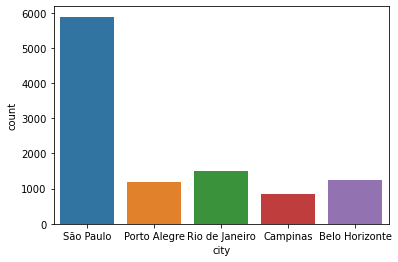

In [133]:
import seaborn as sns
# Número de imóveis por cidade
sns.countplot(x='city', data=houses)

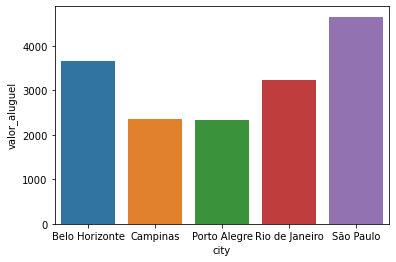

In [136]:
# Média de aluguel por cidade
sns.barplot(x='city', y='valor_aluguel', data=houses.groupby('city')['valor_aluguel'].mean().reset_index())

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

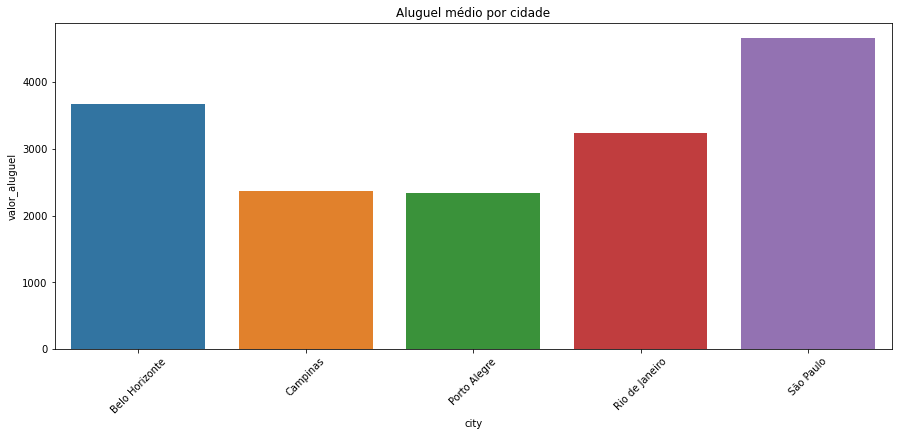

In [142]:
# Mesmo gráfico de cima, estilizado via pyplot
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
sns.barplot(x='city', y='valor_aluguel', data=houses.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Aluguel médio por cidade')
plt.xticks(rotation=45)

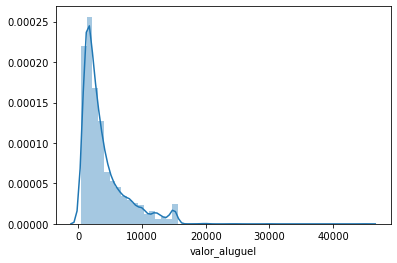

In [143]:
# Distribuição de uma vaiável
sns.distplot(houses['valor_aluguel'])

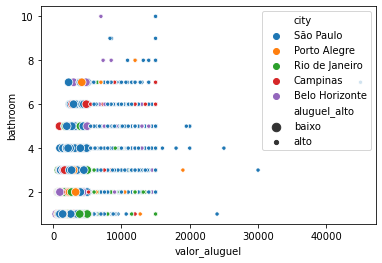

In [150]:
# Scatter com 'valor_aluguel' no eixo x e 'bathroom' no eixo y
# hue: coloca cada valor da variável em uma cor diferente
# size: coloca cada valor de uma variável em um tamanho diferente
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', data=houses, hue='city', size='aluguel_alto')

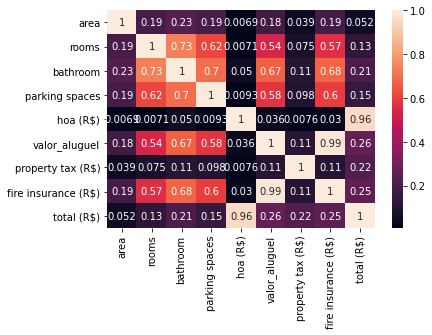

In [155]:
# Heatmap das correlações
# annot = True: Exibe os valores da correlação
sns.heatmap(houses.corr(), annot = True)

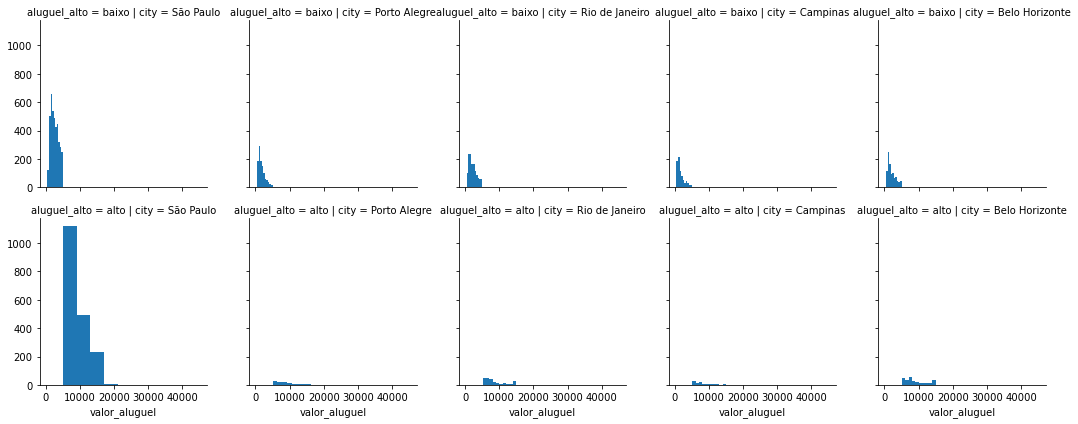

In [157]:
g = sns.FacetGrid(houses, col='city', row='aluguel_alto')
g = g.map(plt.hist, 'valor_aluguel')